# Water Pump Functionality Prediction 
**By Assimagbe Albert Raphael**

![](https://i.imgur.com/8Ev8H1H.png 



# Introduction

Access to reliable water sources is vital for rural communities, yet many regions face challenges maintaining water pumps. The provided dataset contains detailed information on pump characteristics, location, and functionality, offering an opportunity to use machine learning to anticipate failures before they occur. This project applies classification models to predict whether a pump is functional, needs repair, or is non-functional, enabling stakeholders to target maintenance resources more effectively and reduce downtime.

**Success criterion:** Deliver a machine learning model and interactive dashboard that accurately identifies pumps requiring repair, with strong recall for this class, and provides geospatial insights to guide maintenance planning.

**Intended audience:** NGO field teams, local municipal planners, and international donors seeking data-driven strategies to improve water infrastructure reliability.


## Competition Link
[DrivenData - Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)


## Project Goals
1. Develop classification models to predict three target classes:
   - Functional water pumps
   - Water pumps that need repair
   - Non-functional water pumps
2. Analyze which factors most strongly influence water pump functionality
3. Create geospatial visualizations to communicate findings effectively
4. Deploy a simple dashboard to showcase models and insights

## Data Description

### Dataset Source
The data comes from Taarifa and the Tanzanian Ministry of Water, which aggregates information about water points across Tanzania.

### Features Overview
The dataset contains 40+ columns representing:
- Geographic information (coordinates, region, basin)
- Technical specifications (pump type, extraction method)
- Management details (installer, funder, payment type)
- Water characteristics (quality, quantity, source)
- Temporal information (construction year, recording date)

### Target Variable
- **status_group**: The operating condition of the waterpoint with three possible values:
  - `functional` - operational with no repairs needed
  - `functional needs repair` - operational but needs repairs
  - `non functional` - not operational

## Project Structure

### 1: Exploratory Data Analysis
- Clean and preprocess the dataset
- Handle missing values and categorical variables
- Create geospatial visualizations of water pump distribution
- Analyze relationships between features and pump functionality
- **Deliverable**: EDA report with visualizations and initial insights

### 2: Model Development
- Feature engineering and selection
- Train baseline classification models
- Implement cross-validation and hyperparameter tuning
- Evaluate models using appropriate classification metrics
- **Deliverable**: Trained models with documented performance metrics

### 3: Insights & Deployment
- Analyze feature importance and model explanations
- Create a Streamlit dashboard with interactive maps
- Document findings and recommendations for maintenance strategies
- **Deliverable**: Interactive dashboard and final presentation

### Required Libraries
```
pandas
numpy
scikit-learn
matplotlib
seaborn
geopandas
folium
streamlit
plotly
```

## Technical Requirements

### Required Technologies
- Python (pandas, scikit-learn, matplotlib/seaborn)
- Geospatial libraries (GeoPandas, Folium)
- Jupyter Notebooks for exploration and documentation
- GitHub for version control
- Streamlit for dashboard creation

### Performance Metric
- Classification accuracy (primary metric)
- Additional metrics: F1-score, precision, recall, and confusion matrix

## Resources

### Dataset Files
- `training_set.csv`: Training data with labels
- `test_set.csv`: Test data for predictions
- `SubmissionFormat.csv`: Template for competition submissions

### Technical Resources
- [Scikit-learn Classification Documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [GeoPandas Documentation](https://geopandas.org/en/stable/)
- [Folium Documentation](https://python-visualization.github.io/folium/)
- [Streamlit Documentation](https://docs.streamlit.io/)

### Domain Resources
- [Taarifa Platform](https://taarifa.org/)
- [Tanzania Water Point Mapping Project](https://www.maji.go.tz/)

## Acknowledgments
- Data provided by Taarifa and the Tanzania Ministry of Water
- Project taken from the DrivenData competition

# Task 1. Project Setup and Data Exploration

**Necessary imports**

In [7]:
# Required imports

import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd
import time
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Typing
from typing import Dict, List, Optional, Set

# Scikit-learn
from sklearn import svm, model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn import discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

from sklearn.model_selection import cross_validate
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                           recall_score, f1_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from IPython.display import display

# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier, CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler


# Multi-label learning
from skmultilearn.problem_transform import BinaryRelevance

# Hyperparameter optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# Statistical libraries
from scipy import stats
import statsmodels.api as sm

**Traning Datasets URL**

In [8]:
# Reading the data

Values_dataset_url1 = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Training_set_values.csv'

labels_dataset_url2 = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Training_set_labels.csv'


In [9]:
# Load the Training Value dataset from the current working directory into a pandas DataFrame 1

try:
    X_df = pd.read_csv(Values_dataset_url1)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

Data loaded successfully.


In [11]:
# Load the TRAINING Label dataset from the current working directory into a pandas DataFrame 2

try:
    Y_df = pd.read_csv(labels_dataset_url2)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

Data loaded successfully.


In [14]:
# Display the shape of the datasets

print('Shape of X: ',X_df.shape)
print('Shape of Y: ',Y_df.shape)

Shape of X:  (59400, 40)
Shape of Y:  (59400, 2)


In [15]:
# Merge training labels
df = pd.merge(X_df, Y_df, on='id')
print('Files successfully loaded and merged!')

Files successfully loaded and merged!


# 01 The Exploratory Data Analysis (EDA) and Visualizations

**Exploratory Data Analysis on Test Data (structure, missingness, geospatial)**

In [17]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [18]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [19]:
#Information about the Test data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [20]:
# Check the Testdata description
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Handling Missing Values for the Test Data**

In [23]:
# --- Missing values ---
missing = df.isna().mean().sort_values(ascending=False)
missing.head(10)

scheme_name              0.485017
scheme_management        0.065286
installer                0.061532
funder                   0.061229
public_meeting           0.056128
permit                   0.051448
subvillage               0.006246
wpt_name                 0.000034
water_quality            0.000000
extraction_type_class    0.000000
dtype: float64

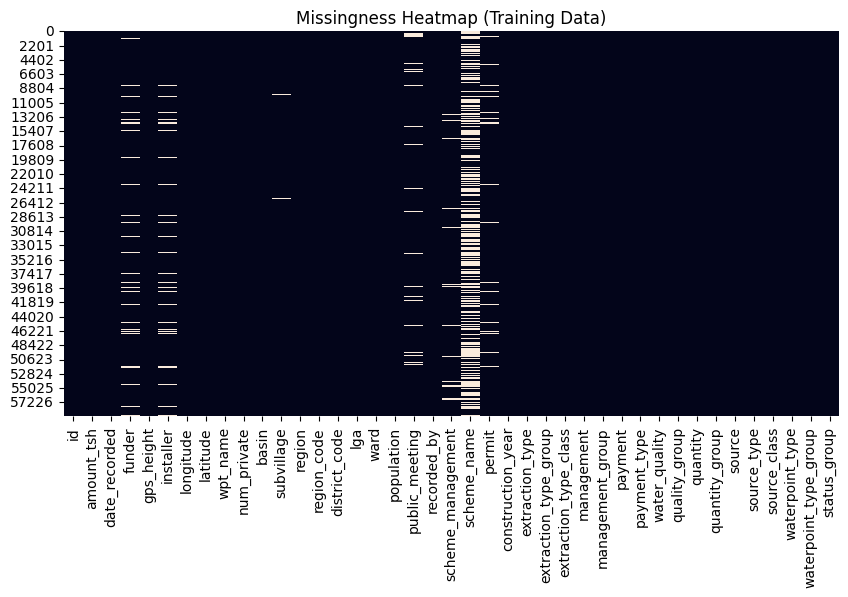

In [24]:
# Visualize missingness
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap (Training Data)")
plt.show()


In [27]:
# --- Handling Missing Values in df ---

# 1. Remove columns with high missing values (>40%)
high_missing_thresh = 0.4
cols_to_drop = df.isna().mean()[df.isna().mean() > high_missing_thresh].index
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns with high missing values: {list(cols_to_drop)}")

# 2. Impute columns with moderate missing values (5% - 40%) using mode
moderate_missing_cols = df.isna().mean()[(df.isna().mean() > 0.05) & 
                                               (df.isna().mean() <= high_missing_thresh)].index

for col in moderate_missing_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Imputed moderate missing column '{col}' with mode: {mode_value}")

# 3. Impute columns with low missing values (<5%) using mode
low_missing_cols = df.isna().mean()[(df.isna().mean() > 0) & 
                                          (df.isna().mean() <= 0.05)].index

for col in low_missing_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Imputed low missing column '{col}' with mode: {mode_value}")

# 4. Check final missing values
missing_final = df.isna().sum()
print("\nFinal missing values after handling:")
print(missing_final[missing_final > 0])


Dropped columns with high missing values: []

Final missing values after handling:
Series([], dtype: int64)


In [28]:
df.isnull().sum()


id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [32]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
# --- Target variable analysis ---status_group
plt.figure(figsize=(6,4))
sns.countplot(x="status_group", data=df, order=df["status_group"].value_counts().index)

plt.title("Distribution of Pump Status (status_group)")
plt.ylabel("Count")
plt.xlabel("Pump Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Also print raw counts + proportions
print(df["status_group"].value_counts())
print("\nProportions (%):")
print(df["status_group"].value_counts(normalize=True) * 100)


In [ ]:
# --- Target variable analysis with seaborn.countplot ---
plt.figure(figsize=(6,4))
sns.countplot(
    x="status_group",
    data=df,
    order=df["status_group"].value_counts().index,  # ensures most common first
    palette="Set2"
)

plt.title("Distribution of Pump Status (status_group)")
plt.ylabel("Count")
plt.xlabel("Pump Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Print counts and proportions for clarity
print("Class counts:\n", df["status_group"].value_counts())
print("\nClass proportions (%):\n", df["status_group"].value_counts(normalize=True) * 100)


In [29]:
# --- Numeric summaries ---
num_cols = test_df1.select_dtypes(include="number").columns
test_df1[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
id,14850.0,37161.972929,21359.364833,10.000000,18727.000000,37361.500000,55799.750000,7.424900e+04
amount_tsh,14850.0,322.826983,2510.968644,0.000000,0.000000,0.000000,25.000000,2.000000e+05
gps_height,14850.0,655.147609,691.261185,-57.000000,0.000000,344.000000,1308.000000,2.777000e+03
longitude,14850.0,34.061605,6.593034,0.000000,33.069455,34.901215,37.196594,4.032502e+01
latitude,14850.0,-5.684724,2.940803,-11.564592,-8.443970,-5.049750,-3.320594,-2.000000e-08
num_private,14850.0,0.415084,8.167910,0.000000,0.000000,0.000000,0.000000,6.690000e+02
region_code,14850.0,15.139057,17.191329,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,14850.0,5.626397,9.673842,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,14850.0,184.114209,469.499332,0.000000,0.000000,20.000000,220.000000,1.146900e+04
construction_year,14850.0,1289.708350,955.241087,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


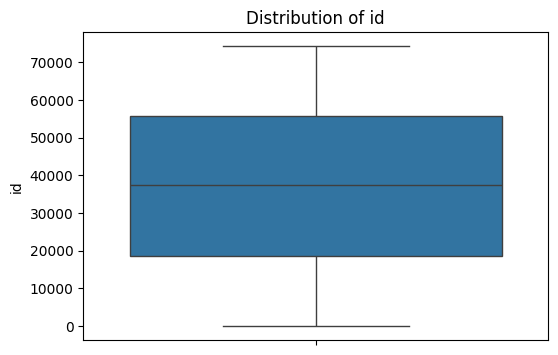

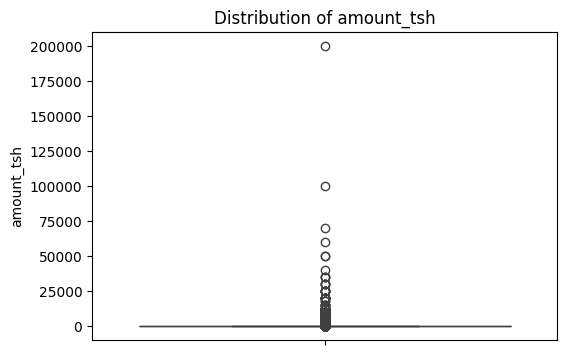

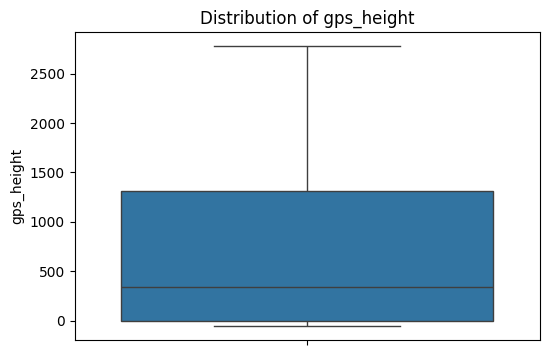

In [41]:
# --- Boxplots for first 3 numeric features ---
for col in num_cols[:3]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=col, data=test_df1)
    plt.title(f"Distribution of {col}")
    plt.show()


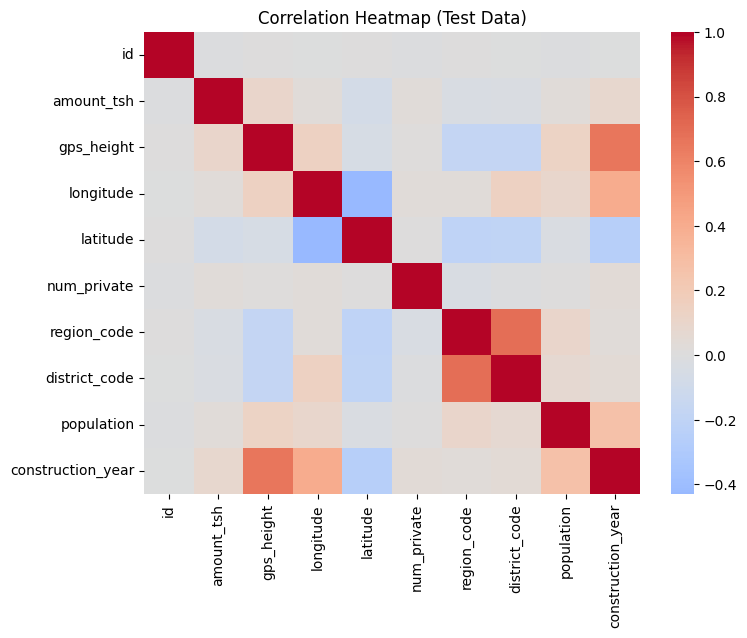

In [42]:
# --- Correlation heatmap ---
if len(num_cols) > 1:
    plt.figure(figsize=(8,6))
    corr = test_df1[num_cols].corr()
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (Test Data)")
    plt.show()


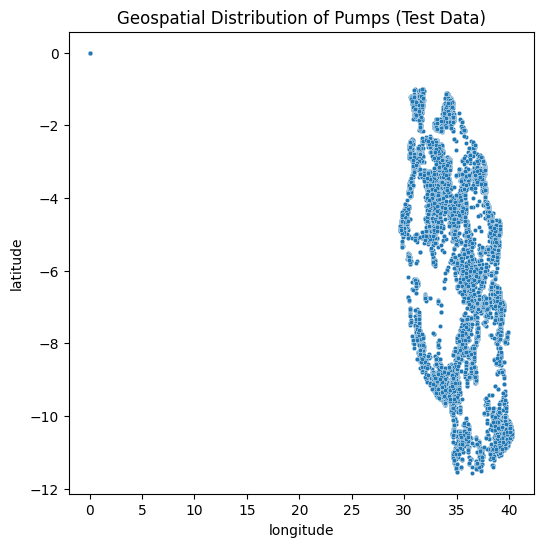

In [43]:
# --- Simple geospatial scatter (if lat/lon exist) ---
lat_cols = [c for c in test_df1.columns if "lat" in c.lower()]
lon_cols = [c for c in test_df1.columns if "lon" in c.lower()]

if lat_cols and lon_cols:
    lat, lon = lat_cols[0], lon_cols[0]
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=lon, y=lat, data=test_df1, s=10)
    plt.title("Geospatial Distribution of Pumps (Test Data)")
    plt.show()


In [44]:
print("✅ EDA complete for Test Data")


✅ EDA complete for Test Data


# 02 The exploratory data analysis (EDA) Train Data

**Exploratory Data Analysis on Training Data (target + features)**

In [ ]:
### Joining the trian_df3 & lable_df2 into a single dataframe ###
Z = label_df2
Z.drop('respondent_id',axis = 1,inplace = True)
frames = [trian_df3,Z]
data = pd.concat(frames,axis=1)

In [ ]:
#Test Data

test_dataset_url = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Test_set_values.csv'


In [ ]:
# Load the Test Value dataset from the current working directory into a pandas DataFrame

try:
    test_df = pd.read_csv(test_dataset_url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

In [ ]:
print('Shape of test_df1: ',test_df.shape)
